## Using the Matrix Inverse Method

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt
import numpy as np
sess = tf.Session()
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

In [4]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [5]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [6]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)
solution_eval = sess.run(solution)

slope: 0.9873998107768261
y_intercept  0.1107117746356891


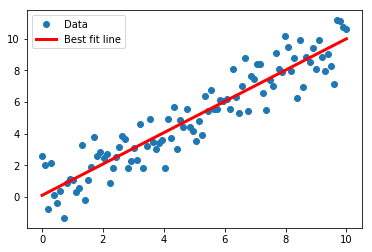

In [7]:
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope: ' + str(slope))
print('y_intercept  ' + str(y_intercept))
slope: 0.955707151739
y_intercept: 0.174366829314
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line',
linewidth=3)
plt.legend(loc='upper left')
plt.show()

## Implementing a Decomposition Method

In [8]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [9]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)
tA_b = tf.matmul(tf.transpose(A_tensor), b)
sol1 = tf.matrix_solve(L, tA_b)
sol2 = tf.matrix_solve(tf.transpose(L), sol1)

slope: 1.0548081973312462
y_intercept: -0.17873899049384617


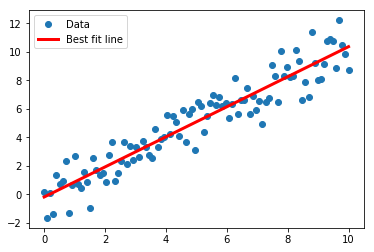

In [10]:
solution_eval = sess.run(sol2)
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))
slope: 0.956117676145
y_intercept: 0.136575513864
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line',
linewidth=3)
plt.legend(loc='upper left')
plt.show()

## Learning The TensorFlow Way of Linear Regression

In [11]:
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [12]:
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [13]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [14]:
loss = tf.reduce_mean(tf.square(y_target - model_output))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [15]:
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
        print('Loss = ''' + str(temp_loss))

Step #25 A = [[2.4568188]]b = [[2.474771]]
Loss = 2.23301
Step #50 A = [[1.7743816]]b = [[3.3872375]]
Loss = 0.650426
Step #75 A = [[1.427327]]b = [[3.937269]]
Loss = 0.44334808
Step #100 A = [[1.2125688]]b = [[4.3169804]]
Loss = 0.43667182


In [16]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

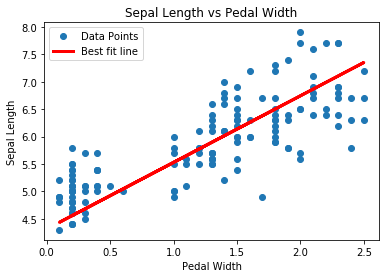

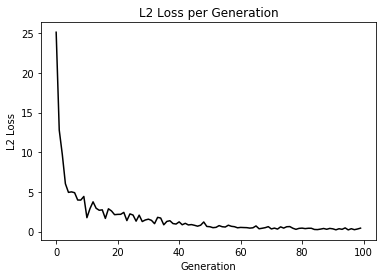

In [17]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line',linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()

## Understanding Loss Functions in Linear Regression

In [18]:
from sklearn import datasets
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
batch_size = 25
learning_rate = 0.1 # Will not converge with learning rate at 0.4
iterations = 50
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.add(tf.matmul(x_data, A), b)

In [19]:
loss_l1 = tf.reduce_mean(tf.abs(y_target - model_output))

Step #25 A = [[1.9897046]]b = [[2.9567466]]
Step #50 A = [[1.572905]]b = [[3.6087472]]


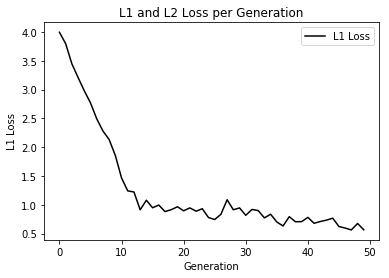

In [20]:
init = tf.global_variables_initializer()
sess.run(init)
my_opt_l1 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l1 = my_opt_l1.minimize(loss_l1)
loss_vec_l1 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step_l1, feed_dict={x_data: rand_x, y_target:rand_y})
    temp_loss_l1 = sess.run(loss_l1, feed_dict={x_data: rand_x,y_target: rand_y})
    loss_vec_l1.append(temp_loss_l1)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
plt.plot(loss_vec_l1, 'k-', label='L1 Loss')
# plt.plot(loss_vec_l2, 'r--', label='L2 Loss')
plt.title('L1 and L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L1 Loss')
plt.legend(loc='upper right')
plt.show()


## Implementing Deming regression

In [21]:
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])

In [22]:
y_vals = np.array([y[0] for y in iris.data])
batch_size = 50
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output = tf.add(tf.matmul(x_data, A), b)

In [23]:
demming_numerator = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data, A), b)))
demming_denominator = tf.sqrt(tf.add(tf.square(A),1))
loss = tf.reduce_mean(tf.truediv(demming_numerator, demming_denominator))

In [33]:
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.1)
train_step = my_opt.minimize(loss)
loss_vec = []
for i in range(250):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%50==0:
        print('Step #''' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #50 A = [[3.377852]] b = [[1.1871141]]
Loss = 0.44576266
Step #100 A = [[3.3887703]] b = [[1.3815025]]
Loss = 0.5087563
Step #150 A = [[3.228474]] b = [[1.4624572]]
Loss = 0.48507708
Step #200 A = [[3.1802514]] b = [[1.6293793]]
Loss = 0.4082261
Step #250 A = [[3.0698915]] b = [[1.7513691]]
Loss = 0.3559346


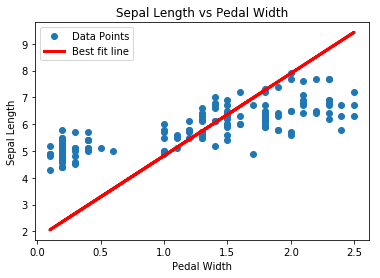

In [34]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line',linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()